In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 
%matplotlib inline

1. โหลด csv เข้าไปใน Python Pandas

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/TawanTan/data_student/master/data_student.csv')
df['UNS'] = df[' UNS']
df.drop(' UNS', axis=1, inplace=True)

2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว

In [4]:
df.head(10)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
5,0.09,0.15,0.40,0.10,0.66,Middle
6,0.10,0.10,0.43,0.29,0.56,Middle
7,0.15,0.02,0.34,0.40,0.01,very_low
8,0.20,0.14,0.35,0.72,0.25,Low
9,0.00,0.00,0.50,0.20,0.85,High


In [5]:
df.tail(10)

,STG,SCG,STR,LPR,PEG,UNS
248,0.89,0.68,0.49,0.65,0.90,High
249,0.72,0.60,0.45,0.79,0.45,Middle
250,0.68,0.63,0.65,0.09,0.66,Middle
251,0.56,0.60,0.60,0.31,0.50,Middle
252,0.54,0.51,0.55,0.64,0.19,Low
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle
257,0.66,0.90,0.76,0.87,0.74,High


In [6]:
df.sample(10)

,STG,SCG,STR,LPR,PEG,UNS
174,0.460,0.440,0.890,0.12,0.66,Middle
25,0.090,0.300,0.680,0.18,0.85,High
110,0.276,0.255,0.810,0.27,0.33,Low
97,0.258,0.250,0.295,0.33,0.77,High
154,0.430,0.305,0.510,0.09,0.64,Middle
85,0.248,0.300,0.310,0.20,0.03,very_low
236,0.523,0.410,0.550,0.60,0.22,Low
38,0.090,0.330,0.310,0.26,0.00,very_low
211,0.800,0.290,0.060,0.31,0.51,Middle
216,0.520,0.288,0.320,0.50,0.30,Low


3. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     258 non-null    float64
 1   SCG     258 non-null    float64
 2   STR     258 non-null    float64
 3   LPR     258 non-null    float64
 4   PEG     258 non-null    float64
 5   UNS     258 non-null    object 
dtypes: float64(5), object(1)
memory usage: 12.2+ KB


In [8]:
df.describe()

,STG,SCG,STR,LPR,PEG
count,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.371147,0.355674,0.468004,0.432713,0.458539
std,0.210271,0.211962,0.245940,0.248108,0.255211
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240750,0.210000,0.291250,0.250000,0.250000
50%,0.327000,0.302500,0.490000,0.330000,0.500000
75%,0.495000,0.497500,0.690000,0.647500,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.930000


4. ใช้ pairplot ดูความสัมพันธ์เบื้องต้น

In [13]:
df['UNS'].unique()

array(['very_low', 'High', 'Low', 'Middle'], dtype=object)

In [14]:
df.replace({'very_low':1, 'Low':2, 
            'Middle':3, 'High':4}, inplace=True)

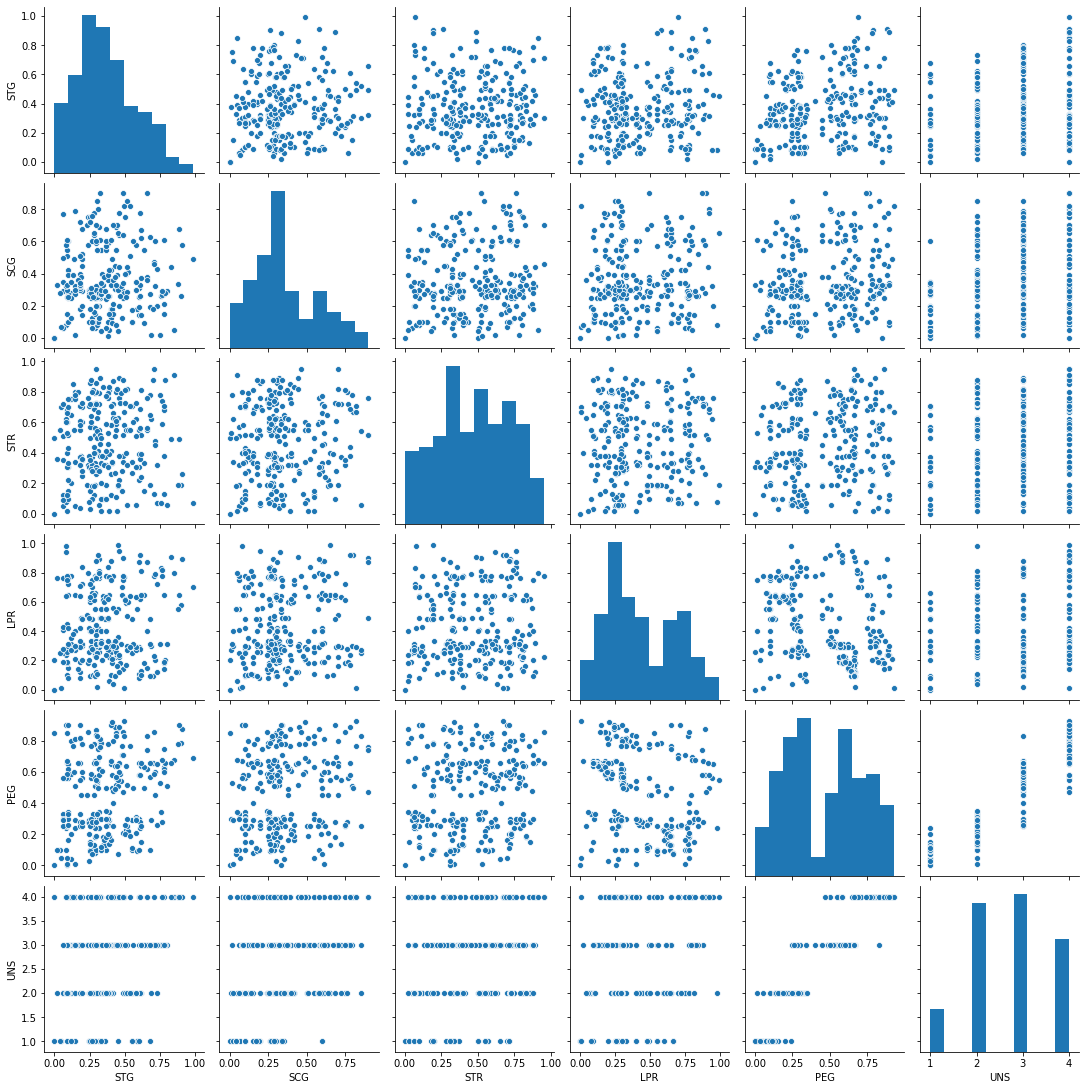

In [15]:
sns.pairplot(df)

5. หา Correlation ของแต่ละฟีเจอร์

In [16]:
df.corr()

,STG,SCG,STR,LPR,PEG,UNS
STG,1.000000,0.081035,0.040841,0.099543,0.206359,0.207472
SCG,0.081035,1.000000,0.083732,0.097816,0.182792,0.262768
STR,0.040841,0.083732,1.000000,0.036481,0.120779,0.171118
LPR,0.099543,0.097816,0.036481,1.000000,-0.269574,0.042064
PEG,0.206359,0.182792,0.120779,-0.269574,1.000000,0.910578
UNS,0.207472,0.262768,0.171118,0.042064,0.910578,1.000000


6. สร้าง Scatter Plot ของข้อมูลที่มี Correlation มากที่สุดและน้อยที่สุด

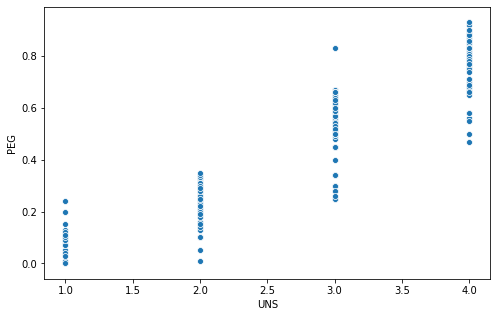

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='UNS', y='PEG')

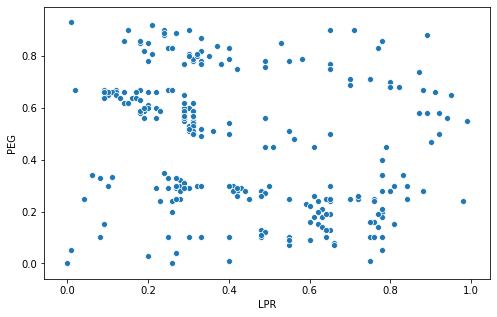

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='LPR', y='PEG')

7. สร้าง Distribution Plot ของแต่ละฟีเจอร์

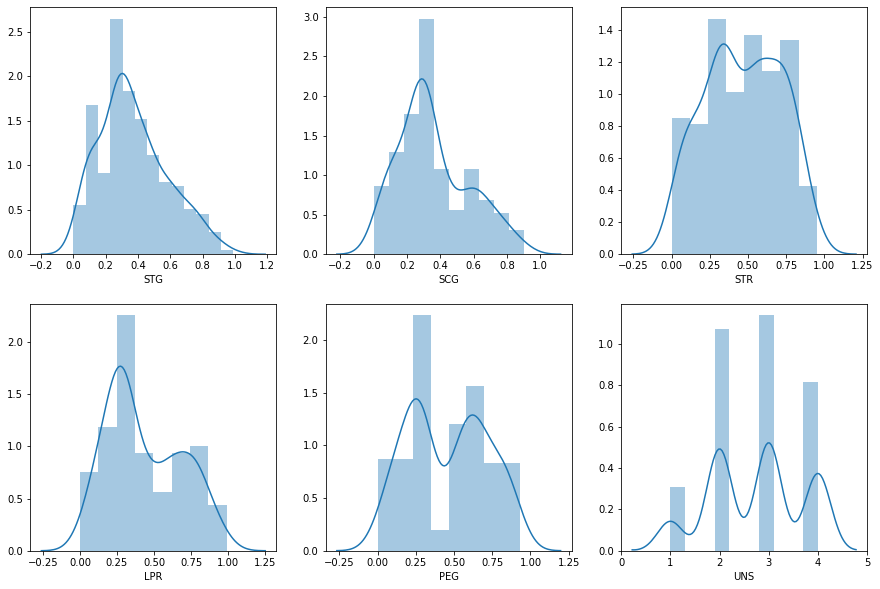

In [21]:
f, axes = plt.subplots(2, 3, figsize=(15,10))
axes=axes.ravel()
for i,j in enumerate(df):
    plot=sns.distplot(df[j], ax=axes[i])

8. สร้าง Box Plot ของแต่ละฟีเจอร์

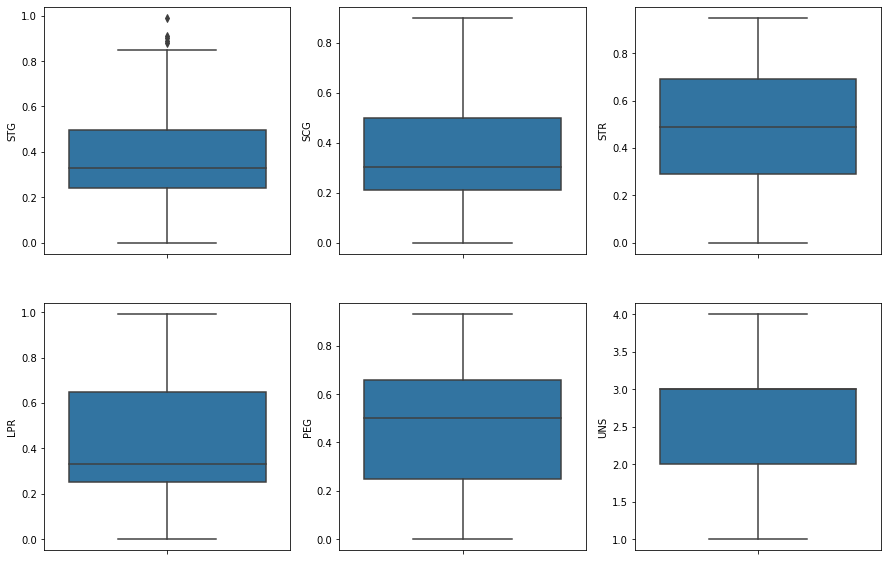

In [22]:
f, axes = plt.subplots(2, 3, figsize=(15,10))
axes=axes.ravel()
for i,j in enumerate(df):
    plot=sns.boxplot(df[j], ax=axes[i], orient='v')

9. สร้าง Dendrogram ของ ฟีเจอร์ STG กับ PEG เพื่อหาจำนวน Cluster ที่เหมาะสม 

In [25]:
X = df[['STG', 'PEG']]

In [26]:
X

,STG,PEG
0,0.00,0.00
1,0.08,0.90
2,0.06,0.33
3,0.10,0.30
4,0.08,0.24
...,...,...
253,0.61,0.58
254,0.78,0.60
255,0.54,0.77
256,0.50,0.26


In [23]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean distances')

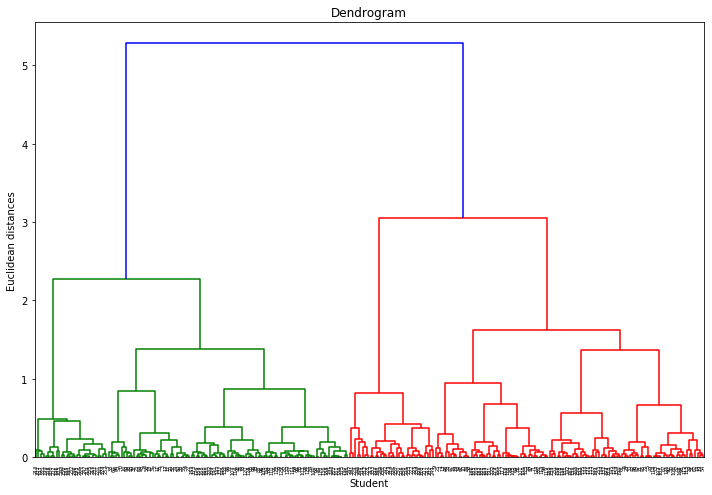

In [32]:
# linkage = Perform hierarchical/agglomerative clustering.
fig = plt.figure(figsize=(12,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
# ward = minimum variance method
plt.title('Dendrogram')
plt.xlabel('Student')
plt.ylabel('Euclidean distances')

10. สร้าง Agglomerative Hierarchical Clustering โดยใช้ฟีเจอร์ STG กับ PEG ด้วยจำนวน Cluster ที่เหมาะสม

In [33]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [34]:
y_hc

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

11. สร้าง Clustering Visualization

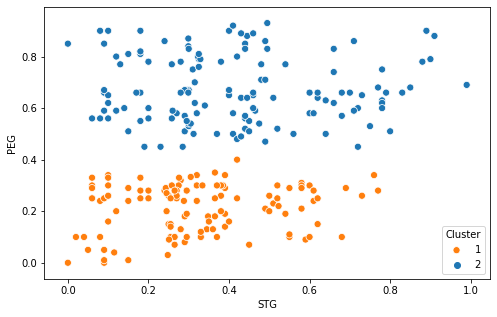

In [42]:
fig = plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='STG', y='PEG', 
                hue=y_hc, s=50)
plt.legend(['1', '2'], title='Cluster',loc='lower right')

12. ลือกฟีเจอร์ใดก็ได้ 2 ฟีเจอร์ที่ไม่ซ้ำเดิม

In [44]:
X2 = df[['LPR','PEG']]

13. สร้าง Dendrogram ของฟีเจอร์ใหม่

Text(0, 0.5, 'Euclidean distances')

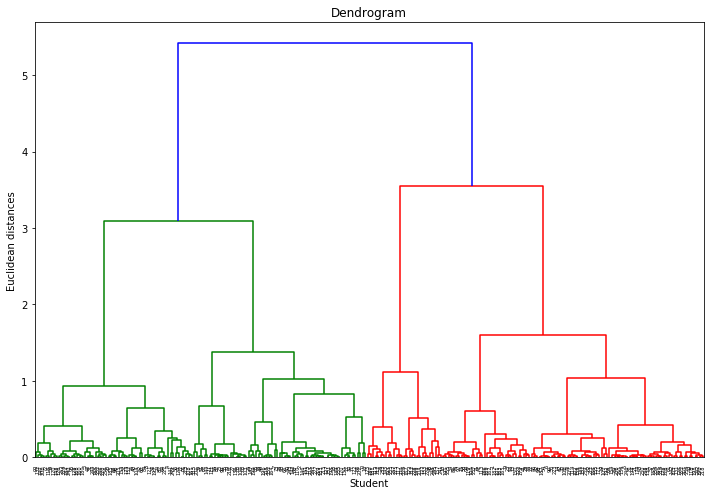

In [45]:
# linkage = Perform hierarchical/agglomerative clustering.
fig = plt.figure(figsize=(12,8))
dendrogram2 = sch.dendrogram(sch.linkage(X2, method='ward'))
# ward = minimum variance method
plt.title('Dendrogram')
plt.xlabel('Student')
plt.ylabel('Euclidean distances')


14. สร้าง Agglomerative Hierarchical Clustering ด้วย จำนวน Cluster ที่เหมาะสม โดยใช้ฟีเจอร์ใหม่

In [64]:
hc2 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage='ward')
y_hc2 = hc2.fit_predict(X2)

15. สร้าง Clustering Visualization

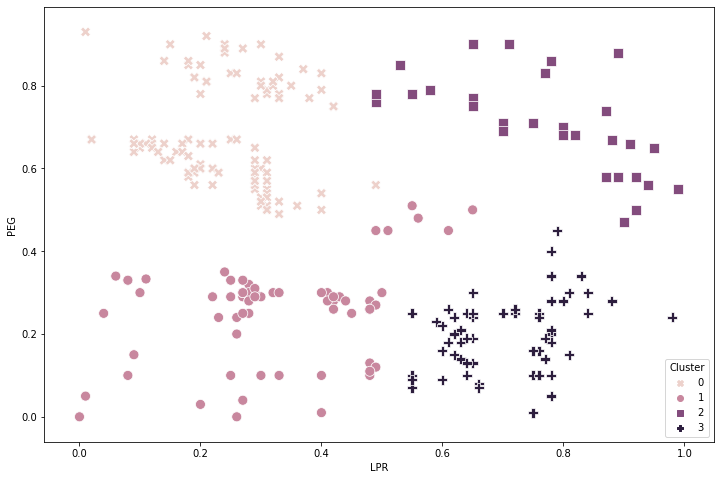

In [131]:
markers = {0:"X", 1:"o", 2:"s", 3:"P"}
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='LPR', y='PEG', 
                s=100, style=y_hc2, 
                legend='full',
                hue=y_hc2,
                markers=markers
               )
plt.legend(#labels=[1, 2, 3, 4],
           title='Cluster',
           loc='lower right'
          )